In [1]:
##Data Forecasting

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [3]:
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [4]:
tf.__version__

'1.13.1'

In [5]:
tf.keras.__version__

'2.2.4-tf'

In [6]:
pd.__version__

'0.24.2'

In [7]:
df = pd.read_csv("dataset.csv")
df.head()

,dayofyear,hour,entry_id,gas,temp,humidity
0,20/05/2019,11:13:23 0,1,46.0,NaN,NaN
1,20/05/2019,11:13:38 0,2,NaN,NaN,NaN
2,20/05/2019,11:13:55 0,3,46.0,NaN,NaN
3,20/05/2019,11:14:12 0,4,NaN,NaN,NaN
4,20/05/2019,11:14:27 0,5,NaN,NaN,NaN


In [8]:
new_df = df.fillna(0)
new_df

,dayofyear,hour,entry_id,gas,temp,humidity
0,20/05/2019,11:13:23 0,1,46.0,0.0,0.0
1,20/05/2019,11:13:38 0,2,0.0,0.0,0.0
2,20/05/2019,11:13:55 0,3,46.0,0.0,0.0
3,20/05/2019,11:14:12 0,4,0.0,0.0,0.0
4,20/05/2019,11:14:27 0,5,0.0,0.0,0.0
5,20/05/2019,11:14:42 0,6,0.0,0.0,0.0
6,20/05/2019,11:15:00 0,7,49.0,0.0,0.0
7,20/05/2019,11:15:16 0,8,49.0,0.0,0.0
8,20/05/2019,11:15:32 0,9,0.0,0.0,0.0
9,20/05/2019,11:15:51 0,10,57.0,0.0,0.0


In [9]:
new_df.head()

,dayofyear,hour,entry_id,gas,temp,humidity
0,20/05/2019,11:13:23 0,1,46.0,0.0,0.0
1,20/05/2019,11:13:38 0,2,0.0,0.0,0.0
2,20/05/2019,11:13:55 0,3,46.0,0.0,0.0
3,20/05/2019,11:14:12 0,4,0.0,0.0,0.0
4,20/05/2019,11:14:27 0,5,0.0,0.0,0.0


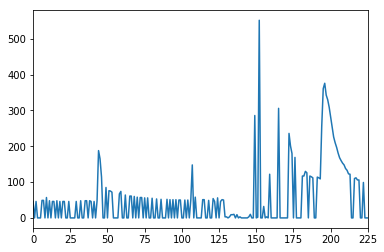

In [10]:
new_df['gas'].plot()

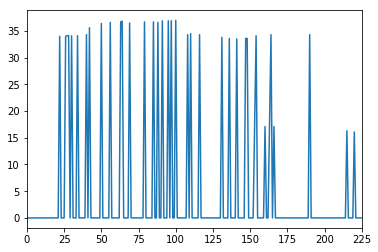

In [11]:
new_df['temp'].plot()

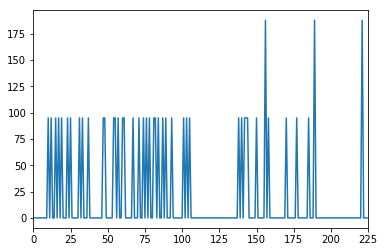

In [12]:
new_df['humidity'].plot()

In [13]:
new_df.values.shape

(226, 6)

In [14]:
new_df.drop(('dayofyear'), axis=1, inplace=True)
new_df.drop(('hour'), axis=1, inplace=True)
new_df.drop(('entry_id'), axis=1, inplace=True)

In [15]:
new_df.values.shape

(226, 3)

In [16]:
new_df.head(1)

,gas,temp,humidity
0,46.0,0.0,0.0


In [17]:
#prediction

In [18]:
target_names = ['gas', 'temp', 'humidity']

In [19]:
shift_days = 1
shift_steps = shift_days * 24  # Number of hours.

In [20]:
new_df_targets = new_df[target_names].shift(-shift_steps)

In [21]:
new_df[target_names].head(shift_steps + 5)

,gas,temp,humidity
0,46.0,0.0,0.0
1,0.0,0.0,0.0
2,46.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,49.0,0.0,0.0
7,49.0,0.0,0.0
8,0.0,0.0,0.0
9,57.0,0.0,0.0


In [22]:
new_df_targets.head(5)

,gas,temp,humidity
0,46.0,0.0,0.0
1,0.0,0.0,95.0
2,0.0,34.0,0.0
3,0.0,34.1,0.0
4,0.0,34.1,0.0


In [23]:
new_df_targets.tail()

,gas,temp,humidity
221,NaN,NaN,NaN
222,NaN,NaN,NaN
223,NaN,NaN,NaN
224,NaN,NaN,NaN
225,NaN,NaN,NaN


In [24]:
#numpy array

In [25]:
x_data = new_df.values[0:-shift_steps]

In [26]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (202, 3)


In [27]:
y_data = new_df_targets.values[:-shift_steps]

In [28]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (202, 3)


In [29]:
num_data = len(x_data)
num_data

202

In [30]:
train_split = 0.9

In [31]:
num_train = int(train_split * num_data)
num_train

181

In [32]:
num_test = num_data - num_train
num_test

21

In [33]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

202

In [34]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

202

In [35]:
num_x_signals = x_data.shape[1]
num_x_signals

3

In [36]:
num_y_signals = y_data.shape[1]
num_y_signals

3

In [37]:
##Scaled Data

In [38]:
type(x_train)

numpy.ndarray

In [39]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 552.0


In [40]:
x_scaler = MinMaxScaler()

In [41]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [42]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [43]:
x_test_scaled = x_scaler.transform(x_test)

In [44]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [45]:
## Data Generator

In [46]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(181, 3)
(181, 3)


In [47]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [48]:
batch_size = 256

In [49]:
sequence_length = 12 *3 * 3
sequence_length

108

In [50]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [51]:
x_batch, y_batch = next(generator)

In [52]:
print(x_batch.shape)
print(y_batch.shape)

(256, 108, 3)
(256, 108, 3)


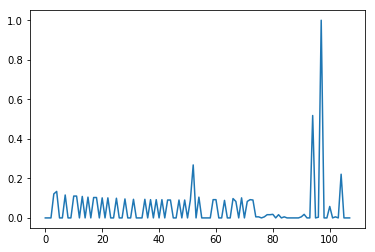

In [53]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

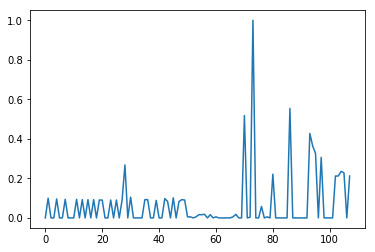

In [54]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [55]:
## Validation Set

In [56]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [57]:
##Create Neural Network

In [58]:
model = Sequential()

In [59]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))

Instructions for updating:
Colocations handled automatically by placer.


In [60]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [61]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [62]:
##LOSS FUNCTION

In [63]:
warmup_steps = 50

In [64]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [65]:
##Compile Mode

In [66]:
optimizer = RMSprop(lr=1e-3)

In [67]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

Instructions for updating:
Use tf.cast instead.


In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         792576    
_________________________________________________________________
dense (Dense)                (None, None, 3)           1539      
Total params: 794,115
Trainable params: 794,115
Non-trainable params: 0
_________________________________________________________________


In [69]:
##Call back function

In [70]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [71]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [72]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [73]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [74]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [75]:
##Train the current Neural Network

In [76]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
1/1 [==============================] - 0s 428ms/sample - loss: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.00000, saving model to 23_checkpoint.keras
100/100 [==============================] - 388s 4s/step - loss: 0.0764 - val_loss: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 28ms/sample - loss: 0.0000e+00

Epoch 00002: val_loss did not improve from 0.00000

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 445s 4s/step - loss: 0.0625 - val_loss: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 35ms/sample - loss: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.00000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [==============================] - 448s 4s/step - loss: 0.0615 - val_loss: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 36ms/sample - loss: 0.0000e+00

Epoch 00004: val_loss did not improve f

In [77]:
##Load Check Point

In [78]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [79]:
##Performance on Test Set

In [80]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 24ms/sample - loss: 0.0000e+00


In [81]:
print("loss (test-set):", result)

loss (test-set): 0.0


In [82]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [83]:
## Generate Predictions

In [84]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

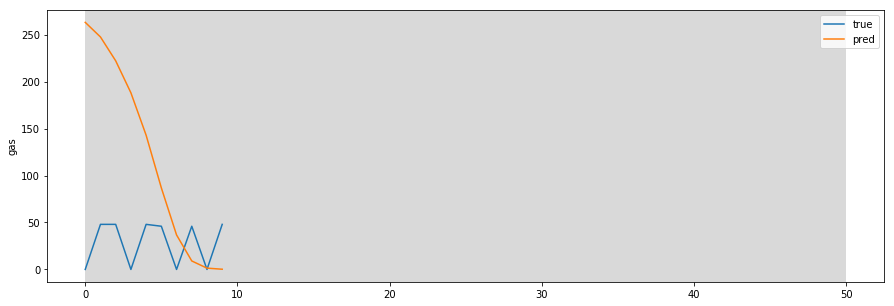

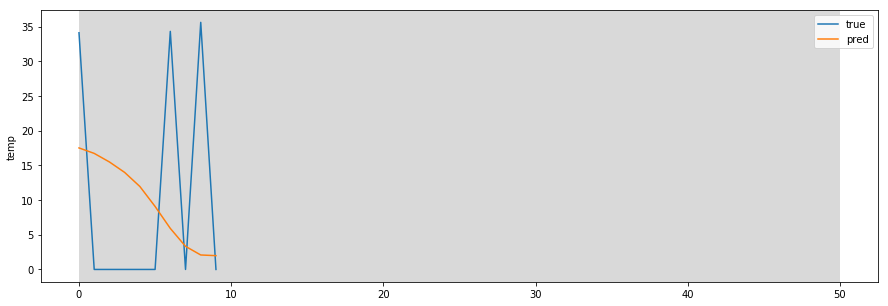

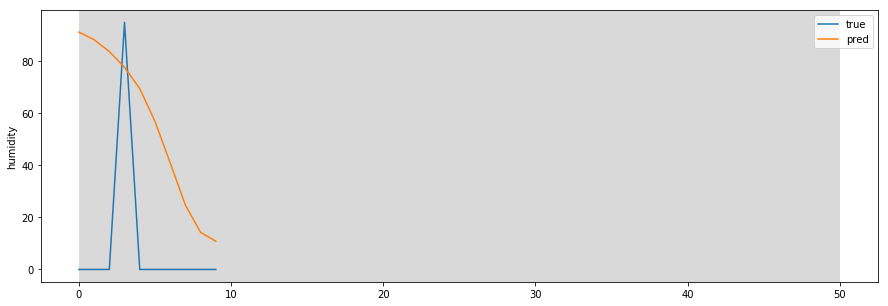

In [85]:
plot_comparison(start_idx=10, length=10, train=True)

In [86]:
##Strange Example

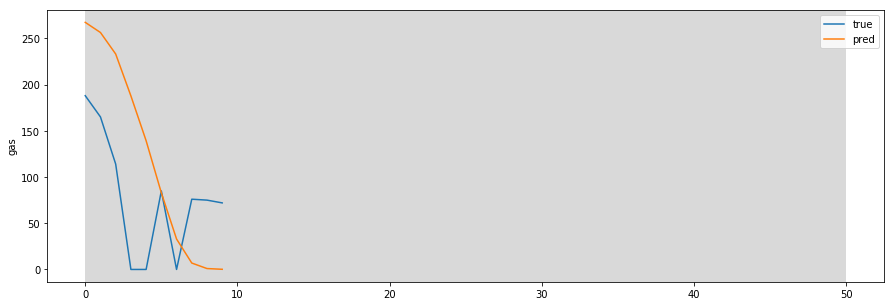

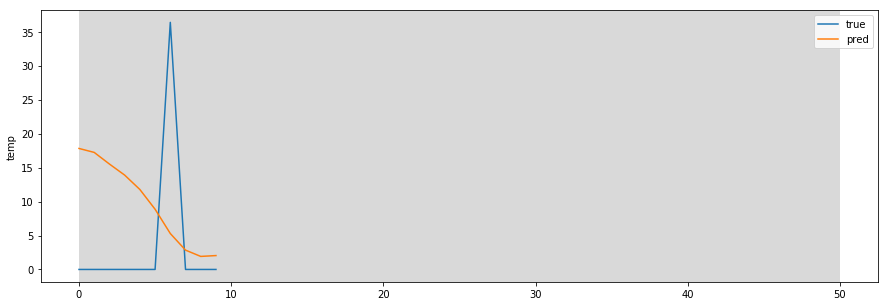

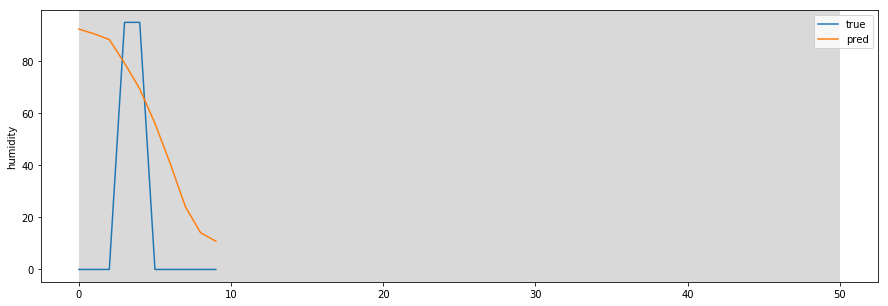

In [87]:
plot_comparison(start_idx=20, length=10, train=True)

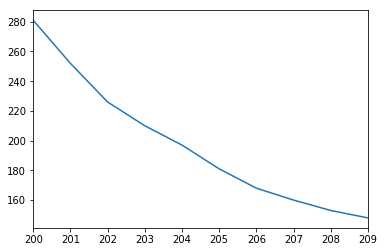

In [88]:
df['gas'][200:200+10].plot()

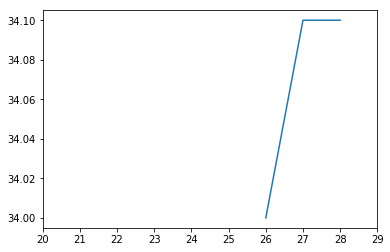

In [89]:
df['temp'][20:20+10].plot()

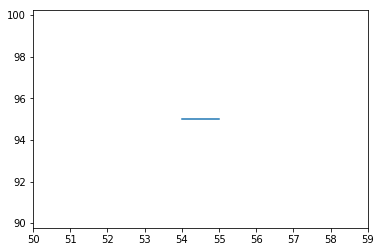

In [90]:
df['humidity'][50:50+10].plot()